## Importando bibliotecas

In [79]:
import pandas 
import seaborn 
import matplotlib
import sklearn
import pickle
print("pandas version:", pandas.__version__)
print("seaborn version:", seaborn.__version__)
print("matplotlib version:", matplotlib.__version__)
print("scikit-learn version:", sklearn.__version__)


pandas version: 2.2.0
seaborn version: 0.13.2
matplotlib version: 3.8.3
scikit-learn version: 1.4.1.post1


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


Diccionario dos dados:

Series_Title – Nome do filme

Released_Year - Ano de lançamento

Certificate - Classificação etária

Runtime – Tempo de duração

Genre - Gênero

IMDB_Rating - Nota do IMDB

Overview - Overview do filme

Meta_score - Média ponderada de todas as críticas 

Director – Diretor

Star1 - Ator/atriz #1

Star2 - Ator/atriz #2

Star3 - Ator/atriz #3

Star4 - Ator/atriz #4

No_of_Votes - Número de votos

Gross - Faturamento


Meta Score (Metascore): É uma pontuação que resume as críticas de vários críticos profissionais em um único número. É calculado pela média das pontuações de diversas críticas publicadas em meios reconhecidos como jornais, revistas e sites especializados em cinema, televisão, música, videogames, etc. Assim, o Metascore fornece uma visão geral da recepção crítica do um filme.

Classificação IMDb (IMDb Rating): É uma avaliação numérica baseada nos votos dos usuários registrados no IMDb, um banco de dados online muito popular sobre filmes, séries de TV, programas de TV, videogames e conteúdo de streaming. Os usuários podem dar uma nota de 1 a 10 a qualquer título que tenham visto, e a classificação IMDb é a média de todas essas notas.

## Carregando dados

In [4]:
dados = pd.read_csv('desafio_indicium_imdb.csv', index_col='Unnamed: 0')

In [5]:
dados.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [6]:

dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB


In [7]:
dados.head(1)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [8]:
dados.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [9]:
dados.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,842.000000,9.990000e+02
mean,7.947948,77.969121,2.716214e+05
std,0.272290,12.383257,3.209126e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.547150e+04
50%,7.900000,79.000000,1.383560e+05
75%,8.100000,87.000000,3.731675e+05
max,9.200000,100.000000,2.303232e+06


## Tratamento dos dados

### Tratar a coluna Runtime 

In [10]:
# Remover "min" e converter para inteiro
dados['Runtime'] = dados['Runtime'].str.replace(' min', '').astype(int)

# Renomear a coluna para Runtime(min)
dados.rename(columns={'Runtime': 'Runtime(min)'}, inplace=True)

### Tratar a coluna Released_Year

In [11]:
dados['Released_Year'].unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [12]:
dados.loc[dados['Released_Year']=='PG']

,Series_Title,Released_Year,Certificate,Runtime(min),Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


verificando informação sobre o filme Apollo 13:

 https://www.imdb.com/title/tt0112384/?ref_=fn_al_tt_1

In [13]:
dados.loc[dados['Series_Title'] == 'Apollo 13', 'Released_Year'] = 1995

In [14]:
dados.loc[dados['Series_Title'] == 'Apollo 13']

,Series_Title,Released_Year,Certificate,Runtime(min),Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,1995,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [15]:
dados['Released_Year'] = dados['Released_Year'].astype(int)

### Tratar a coluna Gross

In [16]:

dados['Gross'] = dados['Gross'].str.replace(',', '').astype(float)


In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int32  
 2   Certificate    898 non-null    object 
 3   Runtime(min)   999 non-null    int32  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    float64
dtypes: float64(3), int32(2), int64(1), object(9)
memory usage: 117.1+ KB


##  Correlações 

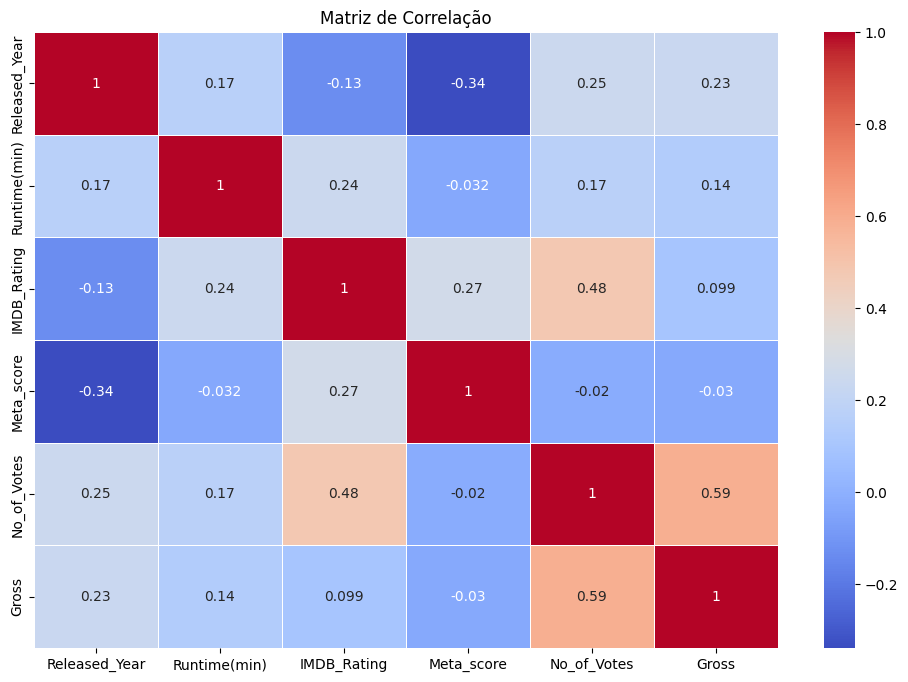

In [18]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(dados.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

## EAD

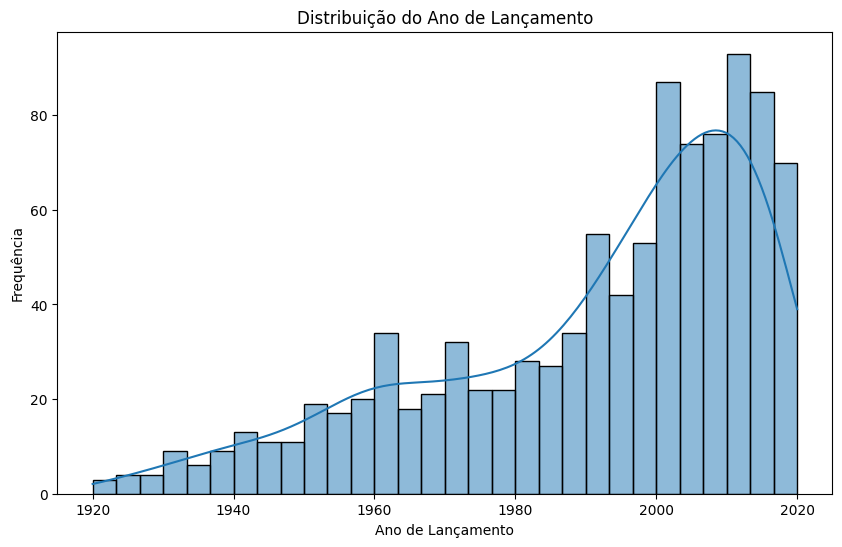

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(dados['Released_Year'], bins=30, kde=True)
plt.title('Distribuição do Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Frequência')
plt.show()

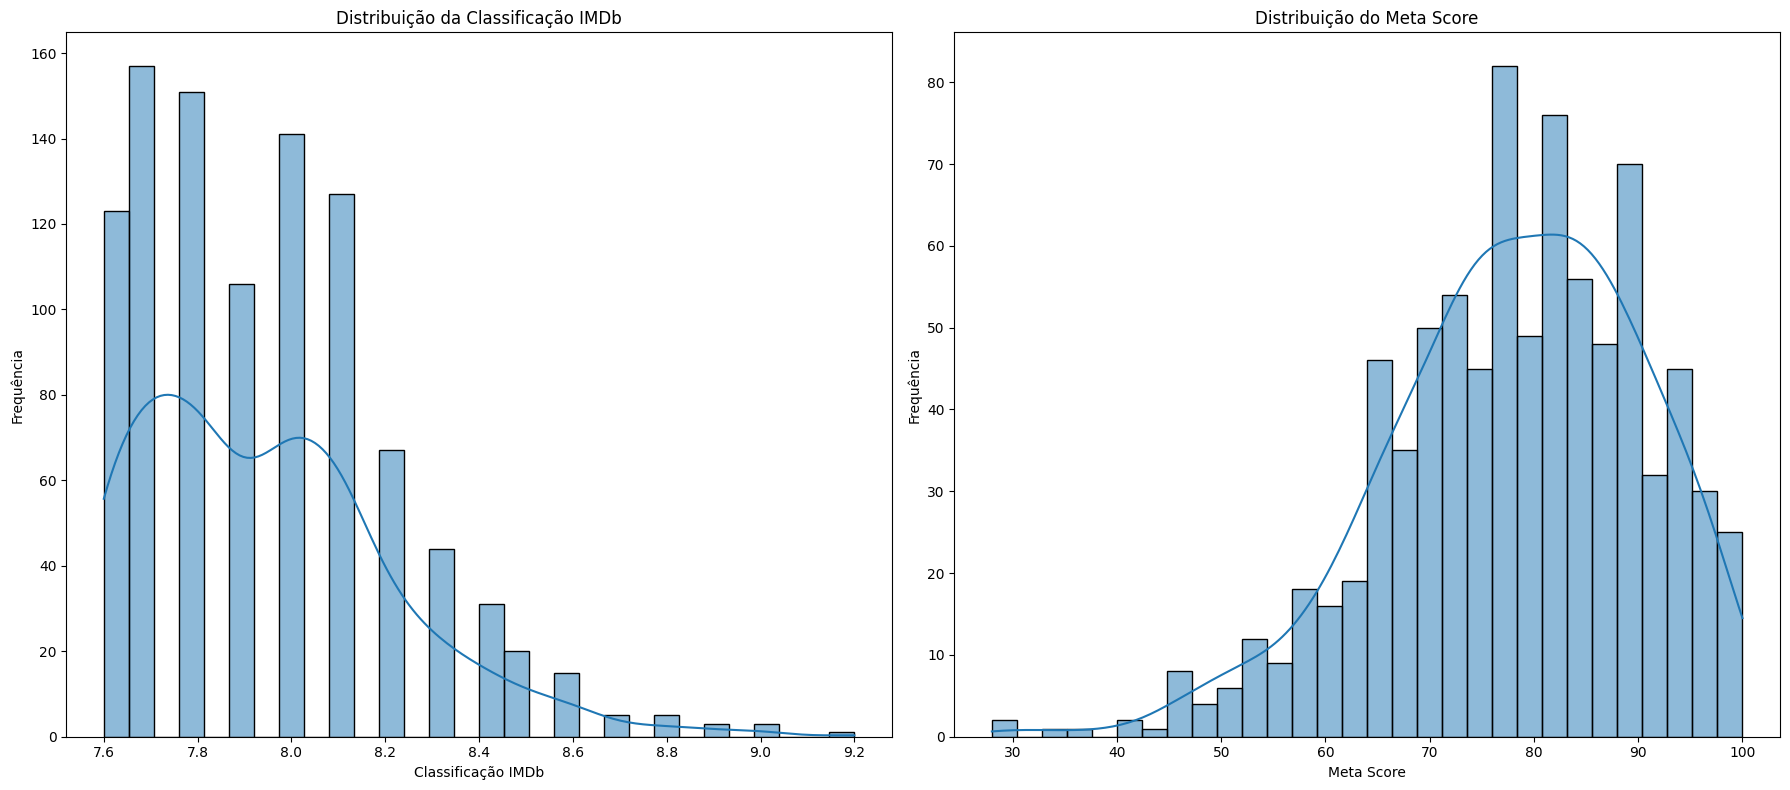

In [20]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8)) 

# Primer subgráfico: Distribuição da classificação do IMDb
sns.histplot(dados['IMDB_Rating'], bins=30, kde=True, ax=ax1)
ax1.set_title('Distribuição da Classificação IMDb')
ax1.set_xlabel('Classificação IMDb')
ax1.set_ylabel('Frequência')

# Segundo subgráfico: Distribuição da classificação do Meta Score
sns.histplot(dados['Meta_score'], bins=30, kde=True, ax=ax2)
ax2.set_title('Distribuição do Meta Score')
ax2.set_xlabel('Meta Score')
ax2.set_ylabel('Frequência')


plt.tight_layout()
plt.show()

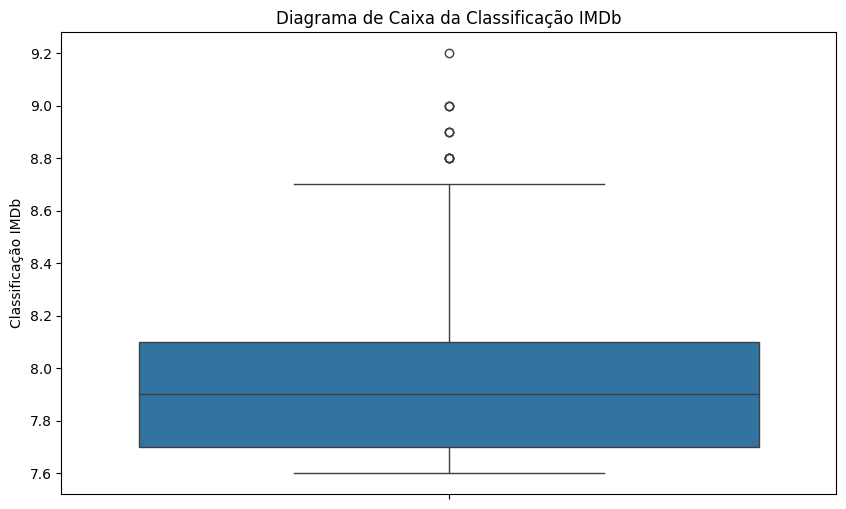

In [21]:

# Diagrama de caixa para a classificação IMDb
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados, y='IMDB_Rating')
plt.title('Diagrama de Caixa da Classificação IMDb')
plt.ylabel('Classificação IMDb')
plt.show()


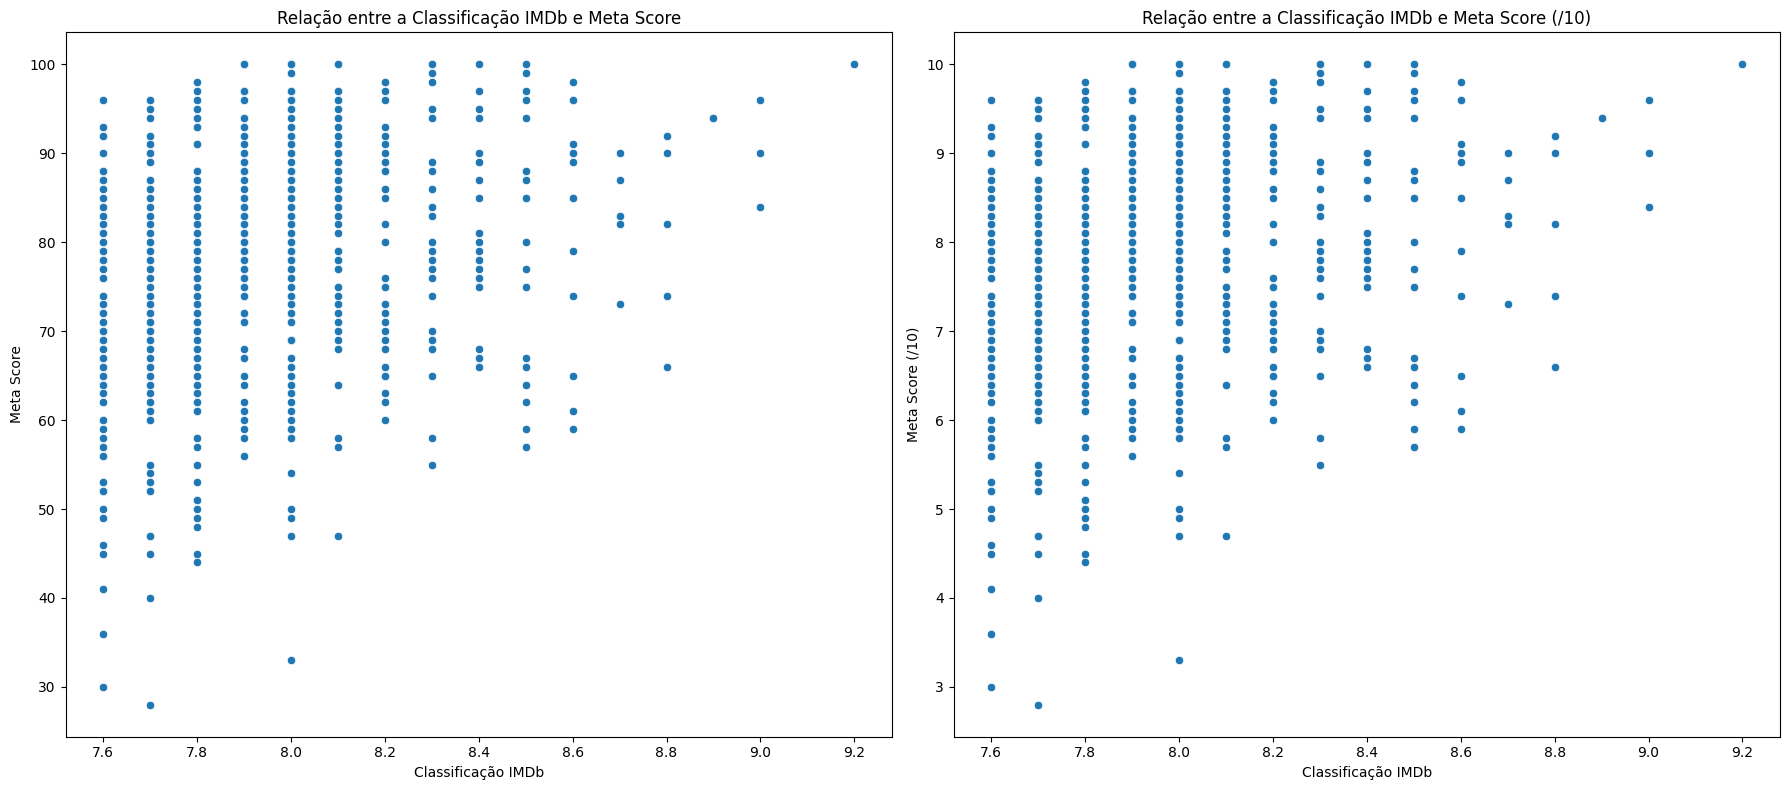

In [22]:
# Relação entre a classificação IMDb e a bilheteria

dados1 = dados.copy()
dados1['Meta_score'] = dados1['Meta_score'] / 10

# Configurar el tamaño de la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))  # Dos subgráficos en una fila

# Primer subgráfico: Relação entre a Classificação IMDb e Meta Score
sns.scatterplot(data=dados, x='IMDB_Rating', y='Meta_score', ax=ax1)
ax1.set_title('Relação entre a Classificação IMDb e Meta Score')
ax1.set_xlabel('Classificação IMDb')
ax1.set_ylabel('Meta Score')

# Segundo subgráfico: Relação entre a Classificação IMDb e Meta Score (/10)
sns.scatterplot(data=dados1, x='IMDB_Rating', y='Meta_score', ax=ax2)
ax2.set_title('Relação entre a Classificação IMDb e Meta Score (/10)')
ax2.set_xlabel('Classificação IMDb')
ax2.set_ylabel('Meta Score (/10)')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico combinado
plt.show()

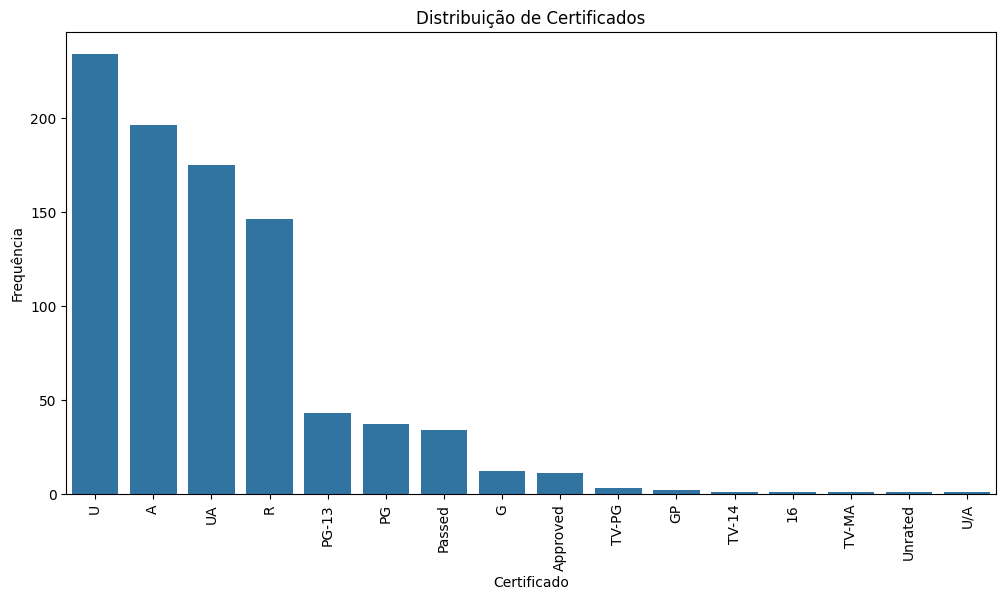

In [23]:
# Distribuição de certificados
plt.figure(figsize=(12, 6))
sns.countplot(data=dados, x='Certificate', order=dados['Certificate'].value_counts().index)
plt.title('Distribuição de Certificados')
plt.xlabel('Certificado')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.show()


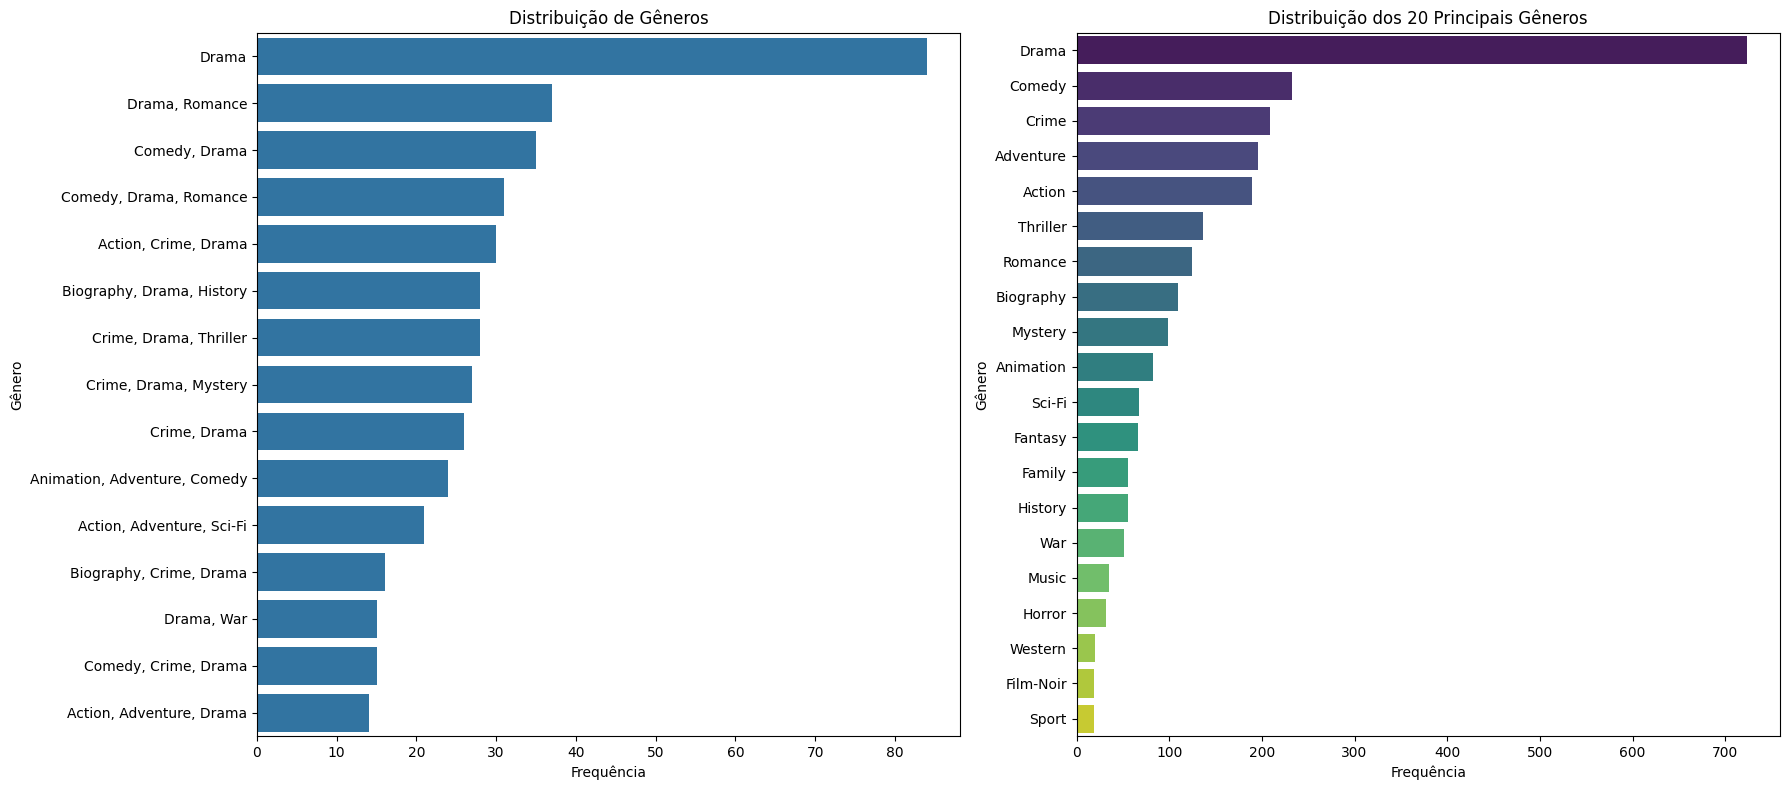

In [24]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))  # Dos subgráficos en una fila

# Primer subgráfico
sns.countplot(data=dados, y='Genre', order=dados['Genre'].value_counts().head(15).index, ax=ax1)
ax1.set_title('Distribuição de Gêneros')
ax1.set_xlabel('Frequência')
ax1.set_ylabel('Gênero')



generos = dados['Genre'].str.split(',').explode().str.strip()
generos_frequencia = generos.value_counts().head(20)

# Segundo subgráfico
sns.barplot(x=generos_frequencia.values, y=generos_frequencia.index, ax=ax2, palette="viridis")
ax2.set_title('Distribuição dos 20 Principais Gêneros')
ax2.set_xlabel('Frequência')
ax2.set_ylabel('Gênero')


plt.tight_layout()
plt.show()

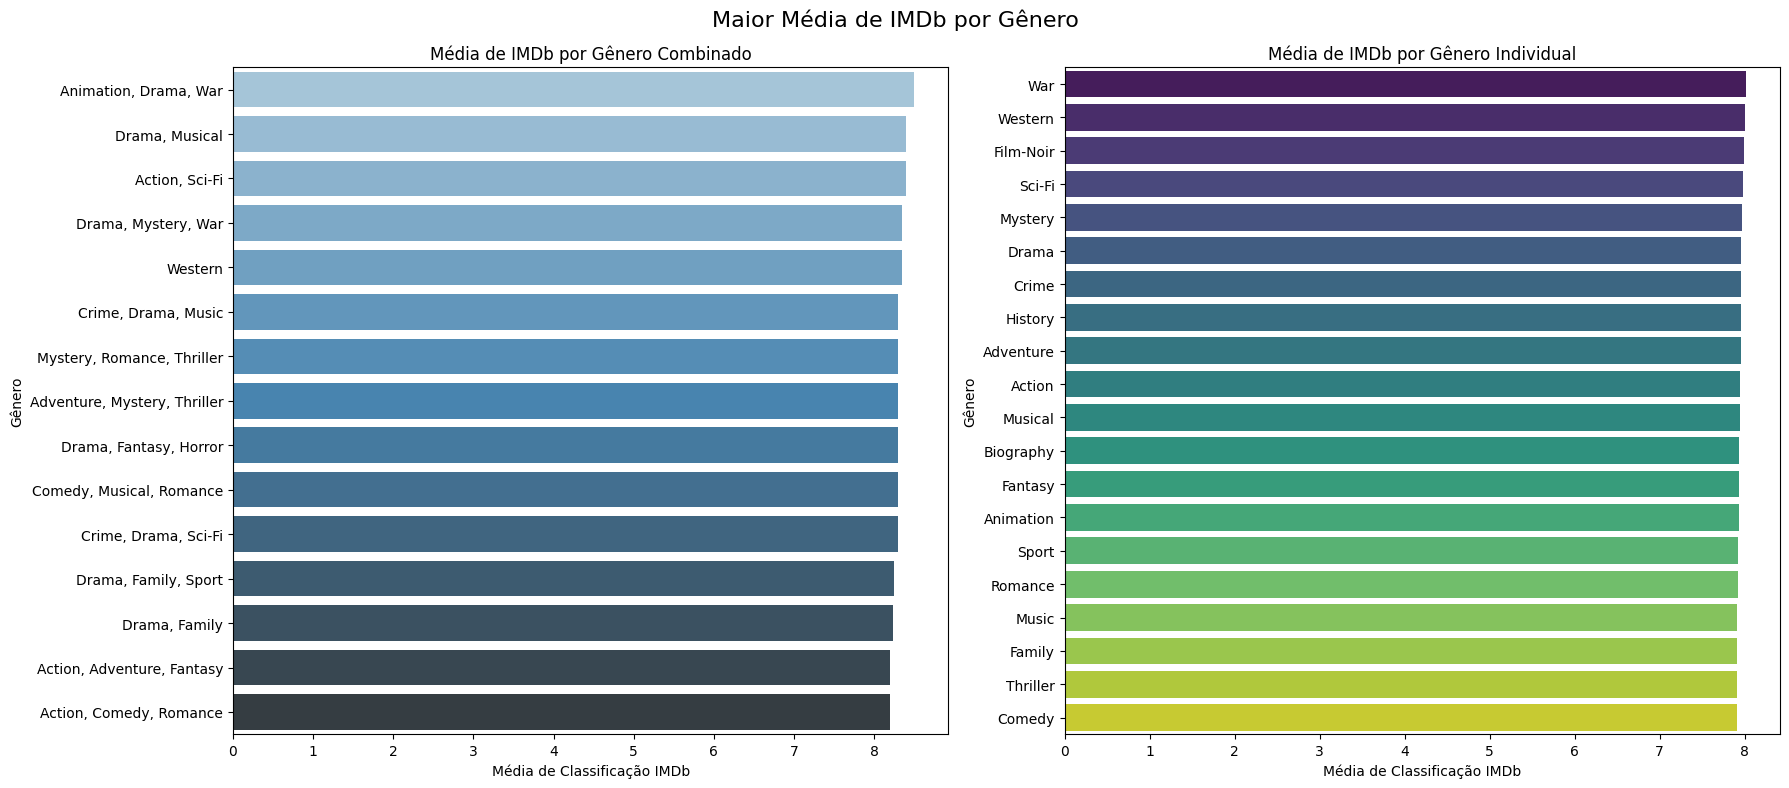

In [25]:
# Promedio de IMDb por género combinado
genre_avg_rating = dados.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False).head(15)

# Separar géneros y calcular la media de IMDb por género individual
dados_exploded = dados.copy()
dados_exploded['Genre'] = dados_exploded['Genre'].str.split(',')
dados_exploded = dados_exploded.explode('Genre')
dados_exploded['Genre'] = dados_exploded['Genre'].str.strip()

individual_genre_avg_rating = dados_exploded.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False).head(20)

# Configurar el tamaño de la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))  # Dos subgráficos en una fila

# Primer subgráfico: Promedio de IMDb por género combinado
sns.barplot(x=genre_avg_rating.values, y=genre_avg_rating.index, ax=ax1, palette="Blues_d")
ax1.set_title('Média de IMDb por Gênero Combinado')
ax1.set_xlabel('Média de Classificação IMDb')
ax1.set_ylabel('Gênero')

# Segundo subgráfico: Promedio de IMDb por género individual
sns.barplot(x=individual_genre_avg_rating.values, y=individual_genre_avg_rating.index, ax=ax2, palette="viridis")
ax2.set_title('Média de IMDb por Gênero Individual')
ax2.set_xlabel('Média de Classificação IMDb')
ax2.set_ylabel('Gênero')

fig.suptitle('Maior Média de IMDb por Gênero', fontsize=16)

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico combinado
plt.show()

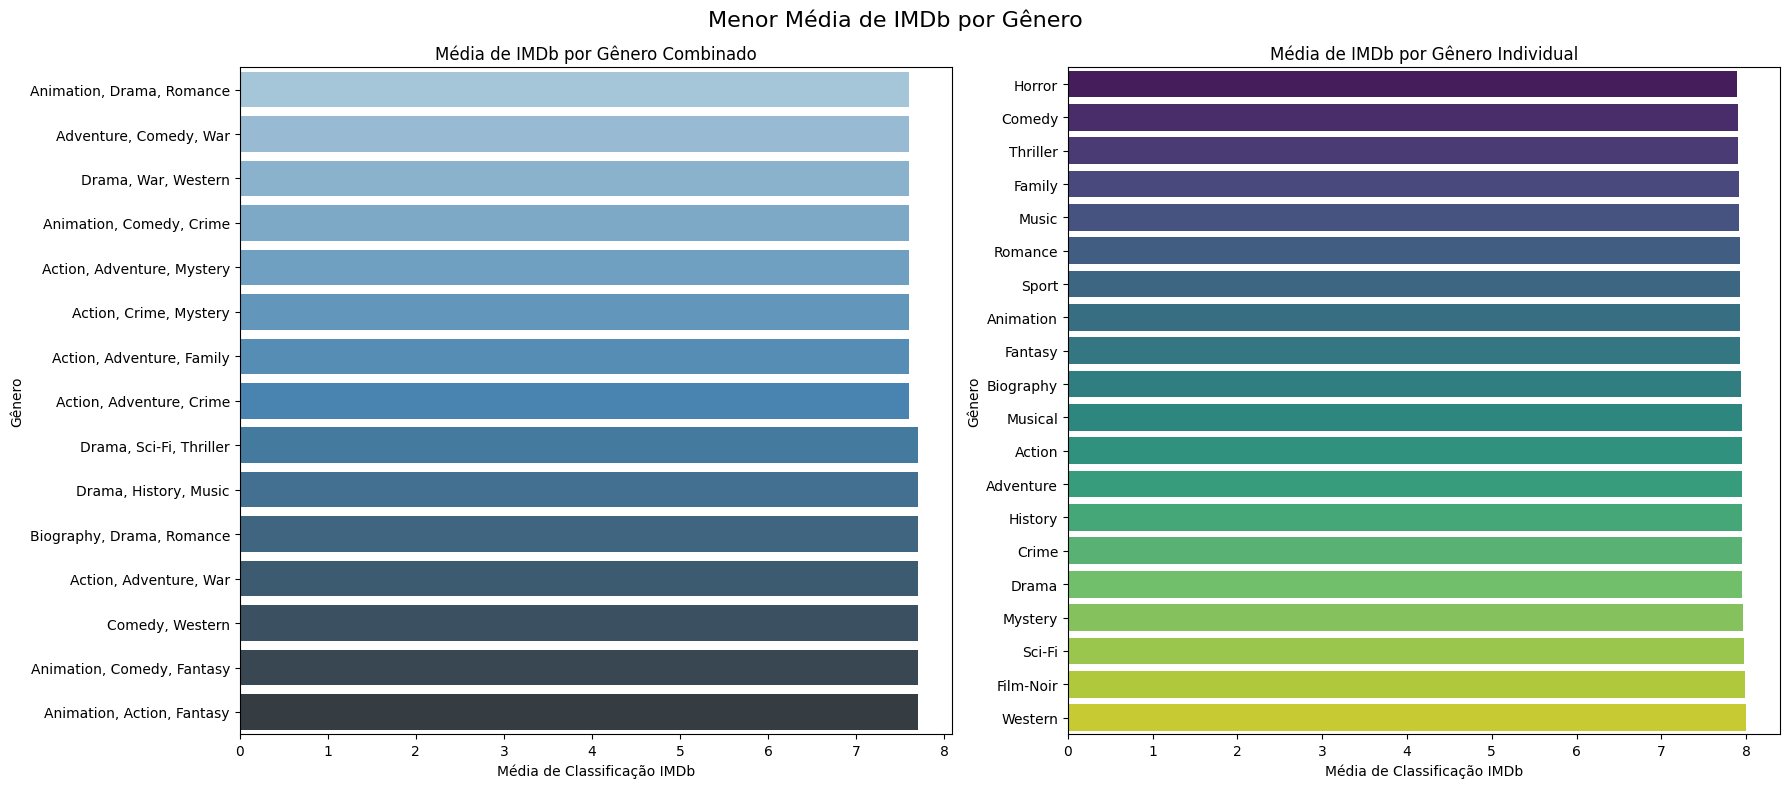

In [26]:
# Promedio de IMDb por género combinado
genre_avg_rating = dados.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=True).head(15)

# Separar géneros y calcular la media de IMDb por género individual
dados_exploded = dados.copy()
dados_exploded['Genre'] = dados_exploded['Genre'].str.split(',')
dados_exploded = dados_exploded.explode('Genre')
dados_exploded['Genre'] = dados_exploded['Genre'].str.strip()

individual_genre_avg_rating = dados_exploded.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=True).head(20)

# Configurar el tamaño de la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))  # Dos subgráficos en una fila

# Primer subgráfico: Promedio de IMDb por género combinado
sns.barplot(x=genre_avg_rating.values, y=genre_avg_rating.index, ax=ax1, palette="Blues_d")
ax1.set_title('Média de IMDb por Gênero Combinado')
ax1.set_xlabel('Média de Classificação IMDb')
ax1.set_ylabel('Gênero')

# Segundo subgráfico: Promedio de IMDb por género individual
sns.barplot(x=individual_genre_avg_rating.values, y=individual_genre_avg_rating.index, ax=ax2, palette="viridis")
ax2.set_title('Média de IMDb por Gênero Individual')
ax2.set_xlabel('Média de Classificação IMDb')
ax2.set_ylabel('Gênero')

fig.suptitle('Menor Média de IMDb por Gênero', fontsize=16)

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico combinado
plt.show()

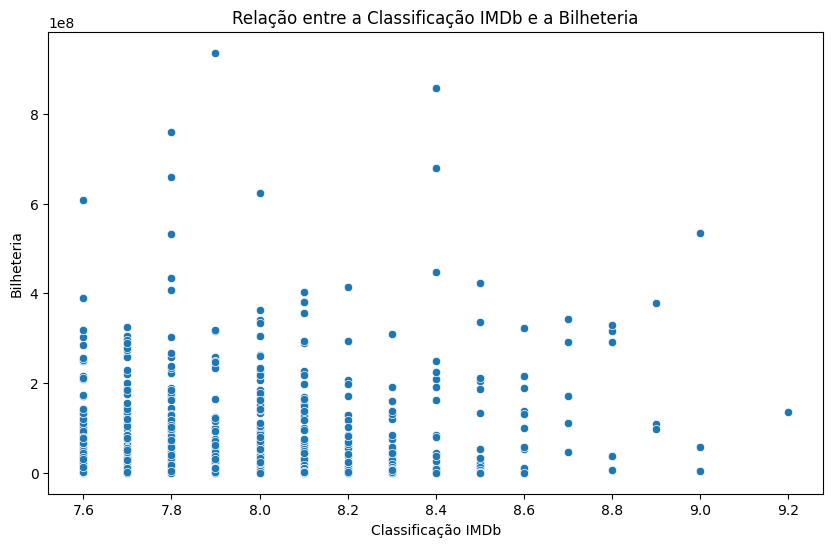

In [27]:

# Relação entre a classificação IMDb e a bilheteria
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='IMDB_Rating', y='Gross')
plt.title('Relação entre a Classificação IMDb e a Bilheteria')
plt.xlabel('Classificação IMDb')
plt.ylabel('Bilheteria')
plt.show()


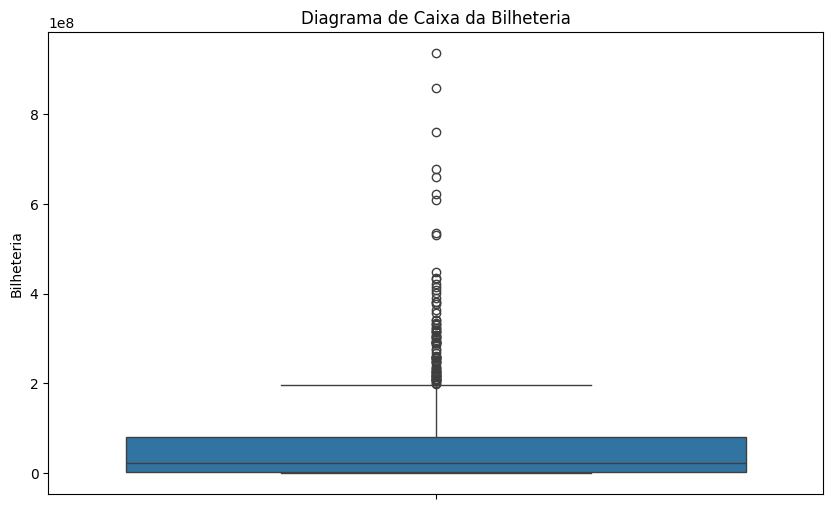

In [28]:

# Diagrama de caixa para a bilheteria
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados, y='Gross')
plt.title('Diagrama de Caixa da Bilheteria')
plt.ylabel('Bilheteria')
plt.show()



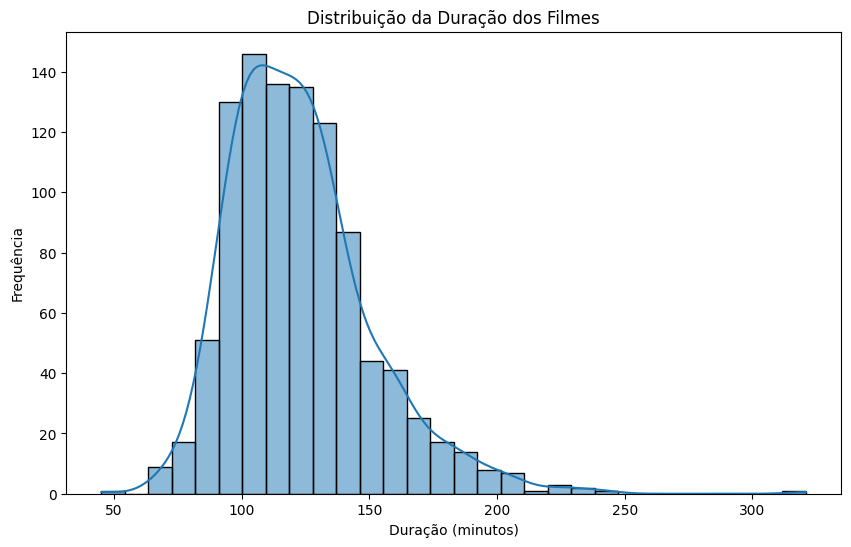

In [29]:


# Distribuição da duração dos filmes
plt.figure(figsize=(10, 6))
sns.histplot(dados['Runtime(min)'], bins=30, kde=True)
plt.title('Distribuição da Duração dos Filmes')
plt.xlabel('Duração (minutos)')
plt.ylabel('Frequência')
plt.show()




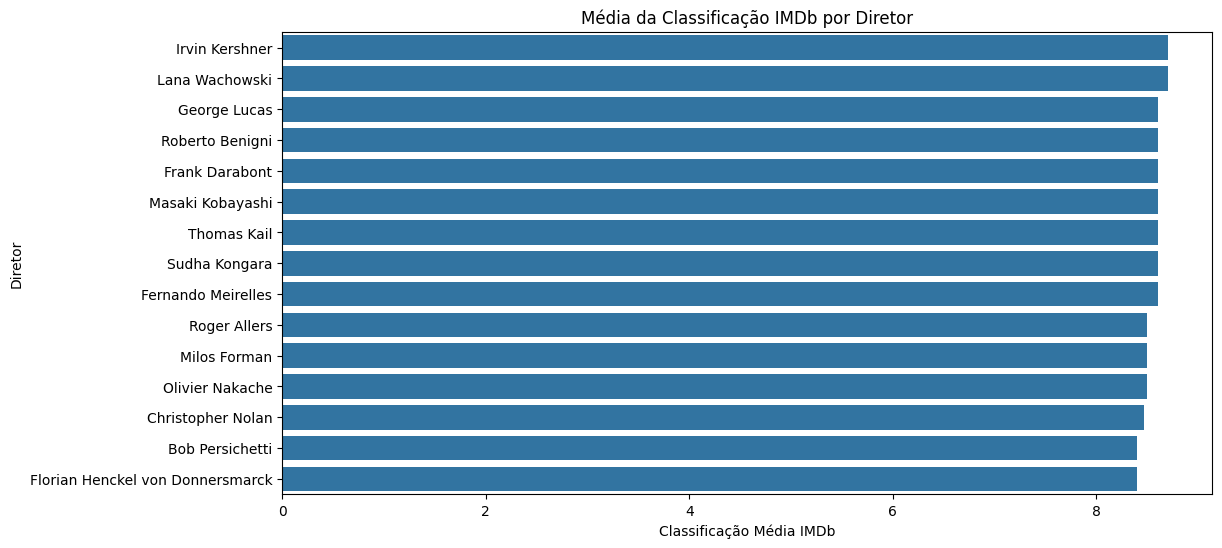

In [30]:
# Média da classificação IMDb por diretor
diretores = dados.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=diretores.values, y=diretores.index)
plt.title('Média da Classificação IMDb por Diretor')
plt.xlabel('Classificação Média IMDb')
plt.ylabel('Diretor')
plt.show()

## Falando sobre os Overview

In [31]:
dados_overview_genre = dados[['Overview', 'Genre']].copy()
dados_overview_genre

,Overview,Genre
1,An organized crime dynasty's aging patriarch t...,"Crime, Drama"
2,When the menace known as the Joker wreaks havo...,"Action, Crime, Drama"
3,The early life and career of Vito Corleone in ...,"Crime, Drama"
4,A jury holdout attempts to prevent a miscarria...,"Crime, Drama"
5,Gandalf and Aragorn lead the World of Men agai...,"Action, Adventure, Drama"
...,...,...
995,A young New York socialite becomes interested ...,"Comedy, Drama, Romance"
996,Sprawling epic covering the life of a Texas ca...,"Drama, Western"
997,"In Hawaii in 1941, a private is cruelly punish...","Drama, Romance, War"
998,Several survivors of a torpedoed merchant ship...,"Drama, War"


In [32]:
dados_overview_genre['Overview'][997]

"In Hawaii in 1941, a private is cruelly punished for not boxing on his unit's team, while his captain's wife and second-in-command are falling in love."

## Modelo predictivo

In [33]:
dados.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime(min)', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [34]:
features = ['Released_Year',  'Runtime(min)',  'Genre', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross']
# 'Certificate',

target = ['IMDB_Rating']

In [35]:
dt = dados[features+target].copy()
dt.head(1)

,Released_Year,Runtime(min),Genre,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDB_Rating
1,1972,175,"Crime, Drama",100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,9.2


In [36]:
dt.isnull().sum()

Released_Year      0
Runtime(min)       0
Genre              0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
IMDB_Rating        0
dtype: int64

### Completando Meta Score

In [37]:
# Calcular a média de Meta_score para cada IMDB_Rating
media_meta_score = dt.groupby('IMDB_Rating')['Meta_score'].mean().reset_index()
media_meta_score.rename(columns={'Meta_score': 'Media_Meta_score'}, inplace=True)

# Juntar a média calculada com o DataFrame original
dt = dt.merge(media_meta_score, on='IMDB_Rating', how='left')

# Preencher os valores faltantes em Meta_score
dt['Meta_score'] = dt.apply(
    lambda row: row['Media_Meta_score'] if pd.isna(row['Meta_score']) else row['Meta_score'], axis=1
)

# Remover a coluna Media_Meta_score, pois não é necessária após a imputação
dt.drop('Media_Meta_score', axis=1, inplace=True)

### Completando Gross

In [38]:
# Calcular a média de Meta_score para cada IMDB_Rating
media_gross = dt.groupby('IMDB_Rating')['Gross'].mean().reset_index()
media_gross.rename(columns={'Gross': 'Media_Gross'}, inplace=True)

# Juntar a média calculada com o DataFrame original
dt = dt.merge(media_gross, on='IMDB_Rating', how='left')

# Preencher os valores faltantes em Meta_score
dt['Gross'] = dt.apply(
    lambda row: row['Media_Gross'] if pd.isna(row['Gross']) else row['Gross'], axis=1
)

# Remover a coluna Media_Meta_score, pois não é necessária após a imputação
dt.drop('Media_Gross', axis=1, inplace=True)

In [39]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  999 non-null    int32  
 1   Runtime(min)   999 non-null    int32  
 2   Genre          999 non-null    object 
 3   Meta_score     999 non-null    float64
 4   Director       999 non-null    object 
 5   Star1          999 non-null    object 
 6   Star2          999 non-null    object 
 7   Star3          999 non-null    object 
 8   Star4          999 non-null    object 
 9   No_of_Votes    999 non-null    int64  
 10  Gross          999 non-null    float64
 11  IMDB_Rating    999 non-null    float64
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 86.0+ KB


### Tratando colunas categóricas

#### Tratando columna dos direitores 

Associaremos um inteiro a cada diretor do filme e substituiremos esta na coluna

In [40]:
# Lista dos diretores
diretores = dt['Director'].unique()

#Define dicionário de diretor e índice, além de realizar a troca de valores no dataframe
dict_diretores = {diretor: index+1 for index, diretor in enumerate(diretores)}

dt.loc[:, 'Director'] = dt['Director'].map(dict_diretores)


In [41]:
# dt

#### Tratando colunas dos atores

In [42]:
atores = dt['Star1'].unique().tolist()
atores.extend(dt['Star2'].unique().tolist())
atores.extend(dt['Star3'].unique().tolist())
atores.extend(dt['Star4'].unique().tolist())

atores = list(set(atores))


In [43]:
dict_atores = {ator: index + 1 for index, ator in enumerate(atores)}

dt.loc[:, 'Star1'] = dt['Star1'].map(dict_atores)
dt.loc[:, 'Star2'] = dt['Star2'].map(dict_atores)
dt.loc[:, 'Star3'] = dt['Star3'].map(dict_atores)
dt.loc[:, 'Star4'] = dt['Star4'].map(dict_atores)

In [44]:
dt.head(1)

,Released_Year,Runtime(min),Genre,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDB_Rating
0,1972,175,"Crime, Drama",100.0,1,1083,2139,90,2080,1620367,134966411.0,9.2


#### Tratando coluna Genre

dt['Genre'] = dt['Genre'].str.split(', ')
genre_cols = []

for genre in dt['Genre'].explode().unique():
    genre_cols.append(genre)
    dt[genre] = dt['Genre'].apply(lambda x: 1 if genre in x else 0)
    
dt.drop('Genre', axis=1, inplace=True)

dt.head()

In [45]:
# Crear lista completa de géneros únicos
dt['Genre'] = dt['Genre'].str.split(', ')
all_genres = set(genre for sublist in dt['Genre'] for genre in sublist)
genre_cols = list(all_genres)

# Asignar valores binarios para cada género
for genre in genre_cols:
    dt[genre] = dt['Genre'].apply(lambda x: 1 if genre in x else 0)

# Eliminar la columna original 'Genre'
dt.drop('Genre', axis=1, inplace=True)

In [46]:
dt.head(1)

,Released_Year,Runtime(min),Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,...,War,Western,Horror,Romance,Musical,Fantasy,History,Crime,Drama,Music
0,1972,175,100.0,1,1083,2139,90,2080,1620367,134966411.0,...,0,0,0,0,0,0,0,1,1,0


#### Normalizando colunas numéricas

### Implementando modelo

#### Separando treino e teste

In [47]:
features = dt.columns.to_list()
features.remove('IMDB_Rating')

target = 'IMDB_Rating'

In [48]:
X_train, X_test, y_train, y_test = train_test_split(dt[features], dt[target], test_size= 0.20, shuffle = True, random_state=17)

#### Linear Regresion

In [49]:


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
coeficients = model.coef_
intercept = model.intercept_

print("Coeficientes:", coeficients)
print("Intersección:", intercept)

Coeficientes: [-2.11948349e-03  1.05707604e-03  3.72470808e-03 -7.68891540e-04
 -1.50877966e-05 -6.65583474e-06 -3.25570998e-06  3.98723433e-06
  4.31267180e-07 -4.79352831e-10  1.87276363e-02 -2.47118141e-02
  1.59321695e-02 -3.73636319e-02 -7.60251252e-02 -5.24055163e-03
 -1.86645591e-03 -2.09298915e-02  6.21630320e-02 -5.04892823e-02
 -5.59463380e-02  4.46122197e-03 -5.39404630e-02 -1.00715395e-02
 -4.52851206e-02  1.22663002e-02 -2.48637762e-02 -2.71111285e-02
 -2.80343661e-02  1.90792632e-02  4.09160957e-02]
Intersección: 11.877447210827595


In [51]:


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (teste): {mse}')
print(f'R^2 Score (teste): {r2}')

Mean Squared Error (teste): 0.03149650310613514
R^2 Score (teste): 0.4634326557728258


In [52]:
y_pred_treino = model.predict(X_train)


mse = mean_squared_error(y_train, y_pred_treino)
r2 = r2_score(y_train, y_pred_treino)

print(f'Mean Squared Error (treino): {mse}')
print(f'R^2 Score (treino): {r2}')

Mean Squared Error (treino): 0.029499716985434618
R^2 Score (treino): 0.6191782439363536


##### Realizando uma predição

In [53]:
d_movie = {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}


In [54]:
d_movie = pd.DataFrame([d_movie])

In [55]:
def pipeline_tratamento(dado):
    features_ = ['Released_Year',  'Runtime(min)',  'Genre', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross']

    # Remover "min" e converter para inteiro
    dado['Runtime'] = dado['Runtime'].str.replace(' min', '').astype(int)
    # Renomear a coluna para Runtime(min)
    dado.rename(columns={'Runtime': 'Runtime(min)'}, inplace=True)

    dado['Released_Year'] = dado['Released_Year'].astype(int)

    dado['Gross'] = dado['Gross'].str.replace(',', '').astype(float)

    dado = dado[features_]

    dado.loc[:, 'Director'] = dado['Director'].map(dict_diretores)

    dado.loc[:, 'Star1'] = dado['Star1'].map(dict_atores)
    dado.loc[:, 'Star2'] = dado['Star2'].map(dict_atores)
    dado.loc[:, 'Star3'] = dado['Star3'].map(dict_atores)
    dado.loc[:, 'Star4'] = dado['Star4'].map(dict_atores)

    for genre in genre_cols:
        dado[genre] = dado['Genre'].apply(lambda x: 1 if genre in x else 0)

    # Eliminar la columna original 'Genre'
    dado.drop('Genre', axis=1, inplace=True)

    return dado


In [56]:
d_movie = pipeline_tratamento(d_movie)

In [57]:
d_movie

,Released_Year,Runtime(min),Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,...,War,Western,Horror,Romance,Musical,Fantasy,History,Crime,Drama,Music
0,1994,142,80.0,19,1240,737,NaN,NaN,2343110,28341469.0,...,0,0,0,0,0,0,0,0,1,0


In [58]:
d_movie['Star4'] = 0
d_movie['Star3'] = 0

In [59]:
new_predictions = model.predict(d_movie)


In [60]:
new_predictions

array([9.07705556])

#### Random Forest Regressor

In [61]:
modelRFR = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)

# Entrenar el modelo
modelRFR.fit(X_train, y_train)

# Hacer predicciones
y_pred_train = modelRFR.predict(X_train)
y_pred_test = modelRFR.predict(X_test)

# Evaluar el modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"MSE no treinamento: {mse_train}")
print(f"MSE no teste: {mse_test}")
print(f"R2 no treinamento: {r2_train}")
print(f"R2 no teste: {r2_test}")

MSE no treinamento: 0.010036038175678861
MSE no teste: 0.027703228246859234
R2 no treinamento: 0.8704414118999553
R2 no teste: 0.528054033273267


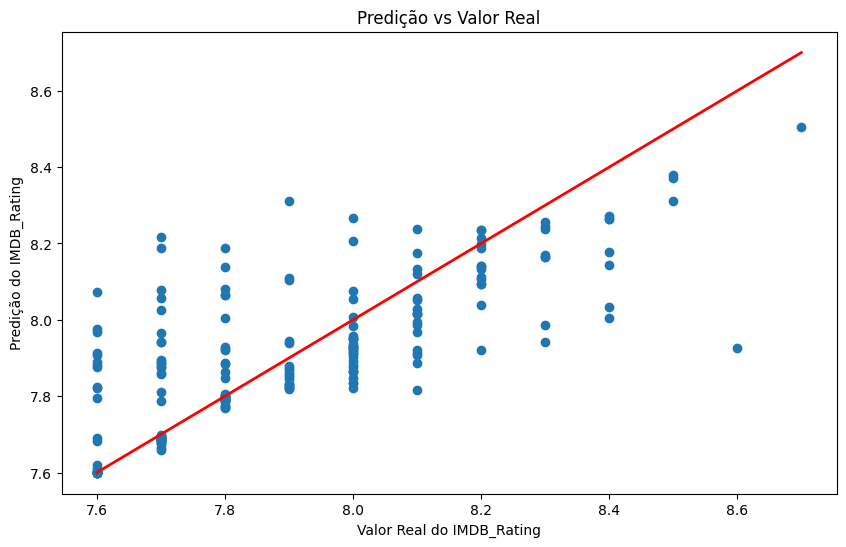

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Valor Real do IMDB_Rating')
plt.ylabel('Predição do IMDB_Rating')
plt.title('Predição vs Valor Real')
plt.show()

In [63]:
new_predictions = modelRFR.predict(d_movie)

In [64]:
new_predictions

array([8.7466119])

## Não considerando os atores

In [65]:
features = dt.columns.to_list()
features.remove('IMDB_Rating')
features.remove('Star1')
features.remove('Star2')
features.remove('Star3')
features.remove('Star4')

target = 'IMDB_Rating'

### Separando treino e teste

In [66]:
X_train, X_test, y_train, y_test = train_test_split(dt[features], dt[target], test_size= 0.25, shuffle = True)

### Linear Regression

In [67]:


model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred = model2.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (teste): {mse}')
print(f'R^2 Score (teste): {r2}')

y_pred_treino = model2.predict(X_train)
mse_t = mean_squared_error(y_train, y_pred_treino)
r2_t = r2_score(y_train, y_pred_treino)
print(f'Mean Squared Error (treino): {mse_t}')
print(f'R^2 Score (treino): {r2_t}')





Mean Squared Error (teste): 0.030181078771562113
R^2 Score (teste): 0.6035782447686532
Mean Squared Error (treino): 0.03016988402010111
R^2 Score (treino): 0.588784670653759


In [69]:
d_movie = {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}

d_movie = pd.DataFrame([d_movie])

In [70]:
def pipeline_tratamento2(dado):
    features_ = ['Released_Year',  'Runtime(min)',  'Genre', 'Meta_score', 'Director', 'No_of_Votes', 'Gross']

    # Remover "min" e converter para inteiro
    dado['Runtime'] = dado['Runtime'].str.replace(' min', '').astype(int)
    # Renomear a coluna para Runtime(min)
    dado.rename(columns={'Runtime': 'Runtime(min)'}, inplace=True)

    dado['Released_Year'] = dado['Released_Year'].astype(int)

    dado['Gross'] = dado['Gross'].str.replace(',', '').astype(float)

    dado = dado[features_]

    dado.loc[:, 'Director'] = dado['Director'].map(dict_diretores)

    for genre in genre_cols:
        dado[genre] = dado['Genre'].apply(lambda x: 1 if genre in x else 0)

    # Eliminar la columna original 'Genre'
    dado.drop('Genre', axis=1, inplace=True)

    return dado



In [71]:
d_movie = pipeline_tratamento2(d_movie)

In [72]:
d_movie

,Released_Year,Runtime(min),Meta_score,Director,No_of_Votes,Gross,Action,Film-Noir,Family,Sport,...,War,Western,Horror,Romance,Musical,Fantasy,History,Crime,Drama,Music
0,1994,142,80.0,19,2343110,28341469.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [73]:
new_predictions = model2.predict(d_movie)


In [74]:
new_predictions

array([9.09394771])

### Random Forest Regressor

In [75]:
modelRFR2 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)

# Entrenar el modelo
modelRFR2.fit(X_train, y_train)

# Hacer predicciones
y_pred_train = modelRFR2.predict(X_train)
y_pred_test = modelRFR2.predict(X_test)

# Evaluar el modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"MSE no treinamento: {mse_train}")
print(f"MSE no teste: {mse_test}")
print(f"R2 no treinamento: {r2_train}")
print(f"R2 no teste: {r2_test}")

MSE no treinamento: 0.01211239632342877
MSE no teste: 0.025644857655082887
R2 no treinamento: 0.834908114330422
R2 no teste: 0.6631604999532024


In [76]:
new_predictions = modelRFR2.predict(d_movie)
new_predictions

array([8.788])

## Salvando modelo escolhido

In [81]:
filename = 'modelo_imdb.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model2, file)

## Usando o modelo salvado

In [82]:
filename = 'modelo_imdb.pkl'
with open(filename, 'rb') as file:
    modelo_cargado = pickle.load(file)



In [84]:
predicciones = modelo_cargado.predict(d_movie)
print(predicciones)

[9.09394771]
